In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset_after_preprocessing.csv')

# Monthly Hotel Booking Analysis

### Perbandingan Jumlah Booking per Bulan berdasarkan Jenis Hotel Periode Tahun 2017-2019

In [4]:
# Membuat tabel agregat perbandingan jumlah pemesanan per bulan berdasarkan jenis hotel periode tahun 2017-2019
jumlah_pemesanan = df.groupby(['hotel','arrival_date_year', 'arrival_date_month']).agg({'total_guests' : 'sum'}).reset_index()
jumlah_pemesanan.columns = ['jenis_hotel','tahun', 'bulan', 'jumlah_pemesanan']

# Mengurutkan nama bulan
urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

jumlah_pemesanan['bulan'] = pd.Categorical(jumlah_pemesanan['bulan'], categories=urutan_bulan, ordered=True)

jumlah_pemesanan.sort_values(by=['jenis_hotel','tahun', 'bulan'])

,jenis_hotel,tahun,bulan,jumlah_pemesanan
2,City Hotel,2017,January,1951.0
1,City Hotel,2017,February,3050.0
5,City Hotel,2017,September,2687.0
4,City Hotel,2017,October,4869.0
3,City Hotel,2017,November,6386.0
0,City Hotel,2017,December,6029.0
10,City Hotel,2018,January,5573.0
9,City Hotel,2018,February,5095.0
13,City Hotel,2018,March,2285.0
6,City Hotel,2018,April,4331.0


In [5]:
# Membandingkan total booking per bulan kedua jenis hotel dalam periode tahun 2017-2019
monthly_booking = pd.pivot_table(jumlah_pemesanan,
               index= ['jenis_hotel', 'bulan'],
               values= ['bulan', 'jumlah_pemesanan'],
               aggfunc= {'bulan' : ['count'],
                         'jumlah_pemesanan' : ['sum']
                         }
                 ).reset_index()

monthly_booking.columns = ['jenis_hotel', 'bulan', 'count', 'total_bookings']
monthly_booking.sort_values(by=['bulan', 'jenis_hotel'])

,jenis_hotel,bulan,count,total_bookings
0,City Hotel,January,2,7524.0
12,Resort Hotel,January,2,4288.0
1,City Hotel,February,2,8145.0
13,Resort Hotel,February,2,5051.0
2,City Hotel,March,2,6721.0
14,Resort Hotel,March,2,3803.0
3,City Hotel,April,2,9376.0
15,Resort Hotel,April,2,5923.0
4,City Hotel,May,2,12333.0
16,Resort Hotel,May,2,6099.0


### Normalisasi Data

Dari tabel monthly_booking di atas terdapat sedikit kejanggalan. Dari tabel tersebut bisa dilihat bahwa bulan September dan Oktober muncul sebanyak 3 kali dalam periode tahun 2017-2019, sedangkan bulan lainnya muncul hanya 2 kali.

Oleh karena itu perlu dilakukan normalisasi dengan cara membagi total booking dengan total bulan dalam periode yang dimaksud, atau dengan kata lain mencari nilai rata-rata untuk setiap bulan.

In [6]:
# Mencari rata-rata total booking per bulan bagi kedua jenis hotel
monthly_booking['bookings'] = round(monthly_booking['total_bookings'] / monthly_booking['count'], 0)
monthly_booking.drop(columns=['count', 'total_bookings'], inplace=True)
monthly_booking.sort_values(by=['bulan', 'jenis_hotel'], inplace=True)
monthly_booking

,jenis_hotel,bulan,bookings
0,City Hotel,January,3762.0
12,Resort Hotel,January,2144.0
1,City Hotel,February,4072.0
13,Resort Hotel,February,2526.0
2,City Hotel,March,3360.0
14,Resort Hotel,March,1902.0
3,City Hotel,April,4688.0
15,Resort Hotel,April,2962.0
4,City Hotel,May,6166.0
16,Resort Hotel,May,3050.0


In [7]:
# Melakukan pivot table
monthly_booking_pt = pd.pivot_table(monthly_booking,
                                    index=['bulan'],
                                    columns=['jenis_hotel'],
                                    values=['bookings']).reset_index()
monthly_booking_pt.columns = ['bulan', 'City Hotel', 'Resort Hotel']
monthly_booking_pt['bulan'] = pd.Categorical(monthly_booking_pt['bulan'], categories=urutan_bulan, ordered=True)


In [8]:
monthly_booking_pt

,bulan,City Hotel,Resort Hotel
0,January,3762.0,2144.0
1,February,4072.0,2526.0
2,March,3360.0,1902.0
3,April,4688.0,2962.0
4,May,6166.0,3050.0
5,June,7550.0,3450.0
6,July,7732.0,3496.0
7,August,7558.0,3182.0
8,September,5734.0,3468.0
9,October,6464.0,3790.0


## Visualisasi 

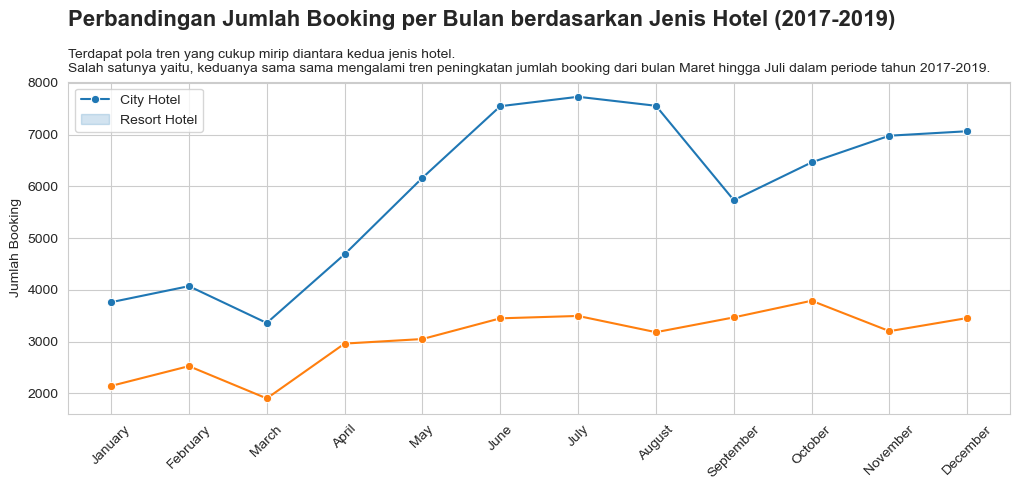

In [9]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Membuat line plot
plt.figure(figsize=(11, 5))
sns.lineplot(data=monthly_booking_pt, x='bulan', y='City Hotel', marker='o')
sns.lineplot(data=monthly_booking_pt, x='bulan', y='Resort Hotel', marker='o')

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Booking per Bulan berdasarkan Jenis Hotel (2017-2019)',fontsize=16, fontweight='bold', pad=40, loc='left')
plt.xlabel('')
plt.ylabel('Jumlah Booking')

# Menambahkan text
plt.text(x=0, y=1.10, s='Terdapat pola tren yang cukup mirip diantara kedua jenis hotel.\n'
         'Salah satunya yaitu, keduanya sama sama mengalami tren peningkatan jumlah booking dari bulan Maret hingga Juli dalam periode tahun 2017-2019.', 
         transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)

# Rotating x-axis labels
plt.xticks(rotation=45)

# Menambahkan legend
plt.legend(['City Hotel', 'Resort Hotel'], loc='upper left')
plt.tight_layout()
plt.show()

Business Insight:
- Tren peningkatan jumlah booking dari bulan Maret hingga Juli diasumsikan karena bertepatan dengan musim semi dan musim panas di Portugal, yang mana hal itu merupakan waktu yang populer bagi para turis untuk berkunjung. Selain itu, di rentang waktu ini juga bertepatan dengan hari libur sekolah, yaitu *spring break* dan *summer vacation*, di beberapa negara.

- Pada bulan Agustus hingga September pengunjung lebih memilih Resort Hotel dibandingkan City Hotel. Hal ini diasumsikan karena bertepatan dengan puncak musim panas dimana pengunjung lebih ingin untuk menikmati suasana resort seperti pesisir pantai.

- Pada bulan Oktober hingga Desember pengunjung cenderung lebih memilih City Hotel dibandingkan Resort Hotel. Hal ini diasumsikan karena terjadi pergantian musim dan mulai memasuki awal musim dingin sehingga pengunjung lebih memilih untuk bermalam di City Hotel dibandingkan Resort Hotel.
